# Project: Prediction for trending videos on YouTube in USA.
The objective of the project is to predict trending videos based on the number of views, likes, dislikes, number of comments, published date and trending date.

### Team: 
1. Narendra Pahuja <br>
2. Akshay Popli <br>
3. Monika Chandrashekara <br>
4. Prerana Chandrashekar <br>
5. Avijit Jaiswal <br>

### Data :
In this project we are using Trending YouTube Statistics by Mitchell J, Kaggle datasets. 
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day. We have selected US for our Analytics.
The dataset has following attributes:
* video_id – ID of the video
* trending_date – Date the video started to trend
* title – Title of the video 
* channel_title – Channel title of the video
* category_id – Category ID of the video 
* publish_time – Time the video was published
* tags – Places this video was tagged
* views – Number of views for the video
* likes – Number of likes for the video
* dislikes – Number of dislikes for the video
* comment_count – Number of comments for the video
* thumbnail_link – Links to thumbnail this video
* comments_disabled – States True if the comments for the video is disabled else False
* ratings_disabled – States True if the rating is disabled for the video else False
* video_error_or_removed – States True if the video has any error or if it is removed else states False.
* description – Description of the video

URL of the source: https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv


###### NOTE: The plotting of data requires matplotlib, pandas, numpy, seaborn, plotly. These must be imported prior to runnung the code.

In [86]:
import numpy as np     # linear algebra
import pandas as pd    # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data:

The dailey trending videos data in United States of America is stored in file "USvideos.csv". The data from this file is read using pd.read_csv() and stored in USvideo.

In [87]:
USvideo = pd.read_csv("USvideos.csv")
Uscategory=pd.read_csv("US_category_id.csv")
Uscategory_df=Uscategory[['items__id','items__snippet__title']]


Uscategory_df.rename(columns = {'items__id':'category_id','items__snippet__title':'category_title'}, inplace = True) 

USvideo = pd.merge(USvideo, Uscategory_df, on="category_id")
USvideo.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


#### Summary of the dataset:

The USvideo contains 16 columns and 40949 rows. 

USvideo.shape

#### Information of the metadata of the USvideo dataset:

From USvideo.info() we can get the following information.

Categorical variables are: video_id, trending_date, title, channel_title, publish_time, tags, thumbnail_link, description.

Numerical variables are: category_id, views, likes, dislikes, comment_count.

Boolean variables are:  comments_disabled, ratings_disabled, video_error_or_removed.

In [88]:
#USvideo.info()
USvideo.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_title'],
      dtype='object')

#### Data head pattern analysis

Using .head() the 1st 5 rows of the USvideo is displayed below for pattern analysis.

In [89]:
USvideo.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
5,pa_oUisZZy0,17.14.11,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,"BuzzFeed|""buzzfeed celeb""|""Mark Ruffalo""|""Thor...",177707,6271,88,275,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs
6,fCTKDn3Q8xQ,17.14.11,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,2017-11-09T11:24:14.000Z,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs
7,_dhneCO4YEE,17.14.11,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,2017-11-09T07:00:01.000Z,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs
8,EYkEshCOhEU,17.14.11,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,2017-11-10T00:24:29.000Z,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs
9,Eg_kW5fw6qU,17.14.11,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,2017-11-09T23:27:18.000Z,"SuperCarlinBrothers|""disney""|""fox""|""disney pri...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs


#### Describing the data columns:

Summary statistics of the USvideo dataset. Gives the record count, average value,standard deviation,minimum and maximum value, data distribution in each quantile for each column in a database.

In [90]:
USvideo.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### Check for null values:
Check for null values and counts the number of null values in the dataset using .isnull().sum() function.
We can observe that there are 570 null values in 'description' of the USvideo dataset as some videos may not contain description,but we are not concerned about description since we will be using tags for our analysis.

In [91]:
USvideo.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_title              0
dtype: int64

In [92]:
USvideo.description.fillna("Missing description", inplace=True)
USvideo.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_title            0
dtype: int64

In [93]:
# category_video = (USvideo['category_id'] == 1)
# filtered_USvideo = USvideo[category_video]
# filtered_USvideo.head(10)

In [94]:
USvideo.tags = USvideo.tags.str.replace("|", ",")
USvideo.tags = USvideo.tags.str.replace('"',"")#Replace  | w
USvideo.tags.head()

0                                      SHANtell martin
1                                  cute,cats,thai,eggs
2    shawn johnson,andrew east,shawn east,shawn and...
3    itsgrace,funny,comedy,vlog,grace,helbig,graceh...
4    wearing online dollar store makeup for a week,...
Name: tags, dtype: object

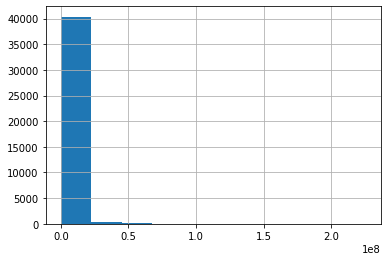

In [95]:
USvideo.views.hist()


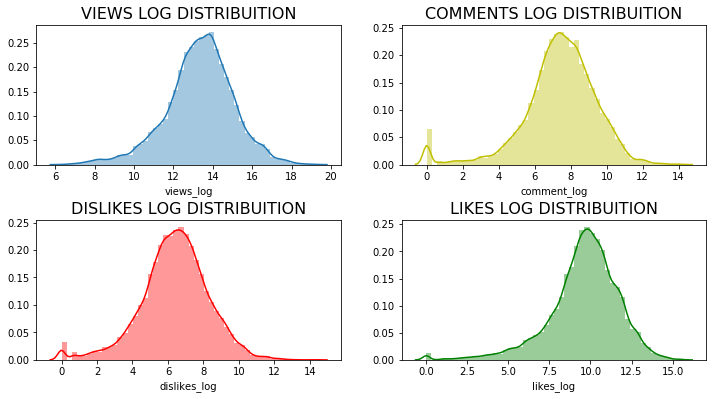

In [96]:
USvideo['likes_log'] = np.log(USvideo['likes'] + 1)
USvideo['views_log'] = np.log(USvideo['views'] + 1)
USvideo['dislikes_log'] = np.log(USvideo['dislikes'] + 1)
USvideo['comment_log'] = np.log(USvideo['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(USvideo['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(USvideo['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(USvideo['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(USvideo['comment_log'], color = 'y')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [97]:
USvideo['category_name'] = np.nan

USvideo.loc[(USvideo["category_id"] == 1),"category_name"] = 'Film and Animation'
USvideo.loc[(USvideo["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
USvideo.loc[(USvideo["category_id"] == 10),"category_name"] = 'Music'
USvideo.loc[(USvideo["category_id"] == 15),"category_name"] = 'Pets and Animals'
USvideo.loc[(USvideo["category_id"] == 17),"category_name"] = 'Sport'
USvideo.loc[(USvideo["category_id"] == 19),"category_name"] = 'Travel and Events'
USvideo.loc[(USvideo["category_id"] == 20),"category_name"] = 'Gaming'
USvideo.loc[(USvideo["category_id"] == 22),"category_name"] = 'People and Blogs'
USvideo.loc[(USvideo["category_id"] == 23),"category_name"] = 'Comedy'
USvideo.loc[(USvideo["category_id"] == 24),"category_name"] = 'Entertainment'
USvideo.loc[(USvideo["category_id"] == 25),"category_name"] = 'News and Politics'
USvideo.loc[(USvideo["category_id"] == 26),"category_name"] = 'How to and Style'
USvideo.loc[(USvideo["category_id"] == 27),"category_name"] = 'Education'
USvideo.loc[(USvideo["category_id"] == 28),"category_name"] = 'Science and Technology'
USvideo.loc[(USvideo["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
USvideo.loc[(USvideo["category_id"] == 25),"category_name"] = 'News & Politics'

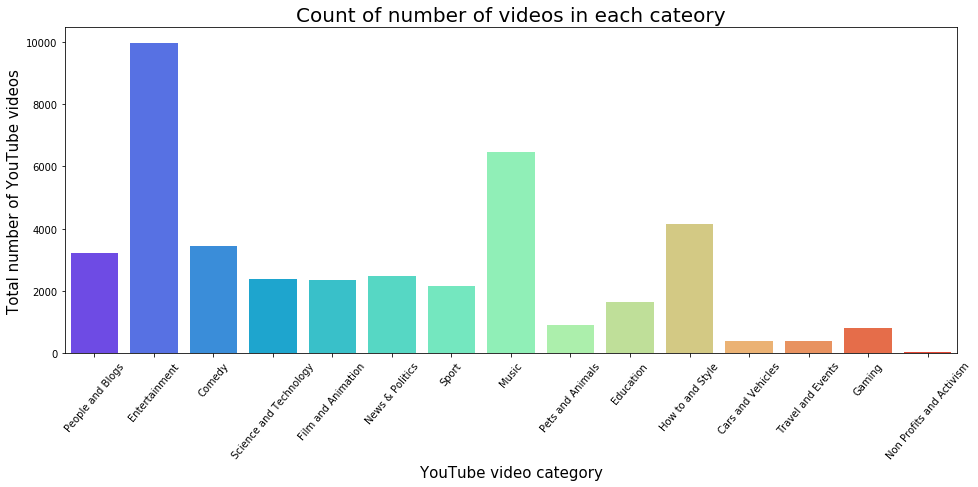

In [98]:
plt.figure(num=None, figsize=(16, 6), facecolor='w')
sns.countplot(x='category_name',data=USvideo, palette="rainbow")
plt.xticks(rotation=50)
plt.xlabel("YouTube video category", fontsize=15)
plt.ylabel('Total number of YouTube videos', fontsize=15)
plt.title('Count of number of videos in each cateory', fontsize=20)
plt.show()

In [99]:
USvideo['publish_time'] = pd.to_datetime(USvideo['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: publish_time_month, dtype: int64


Text(0, 0.5, 'Count')

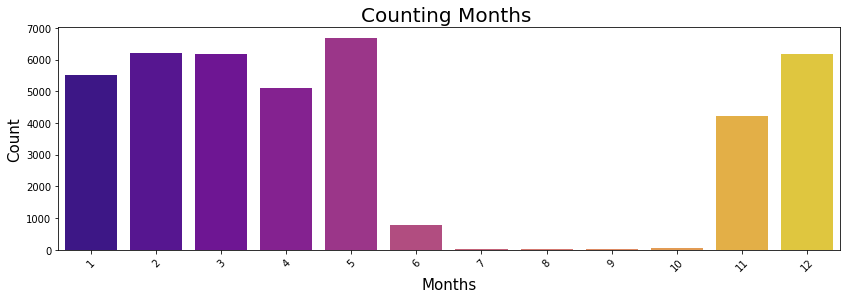

In [100]:
USvideo['publish_time_month'] = USvideo['publish_time'].dt.month

print("Category Name count")
print(USvideo['publish_time_month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x = 'publish_time_month', data=USvideo, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Category Name count
16    3669
15    3483
17    3447
18    2889
14    2807
Name: publish_time_hour, dtype: int64


Text(0, 0.5, 'Count')

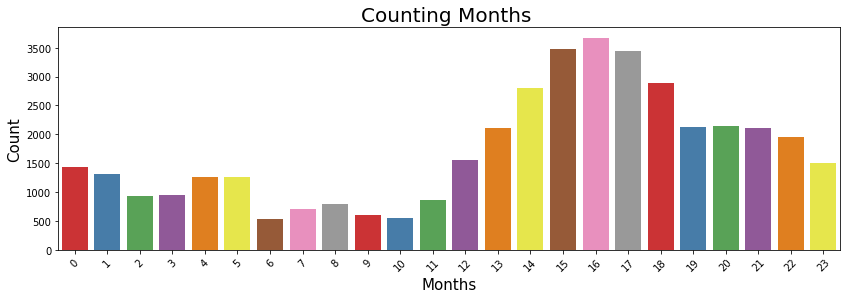

In [101]:
USvideo['publish_time_hour'] = USvideo['publish_time'].dt.hour

print("Category Name count")
print(USvideo['publish_time_hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x = 'publish_time_hour', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [102]:
USvideo['trending_date'] = pd.to_datetime(USvideo['trending_date'], format='%y.%d.%m',  errors='coerce')

Category Name count
12    6200
5     6199
3     6183
1     5796
2     5571
Name: trending_date_month, dtype: int64


Text(0, 0.5, 'Count')

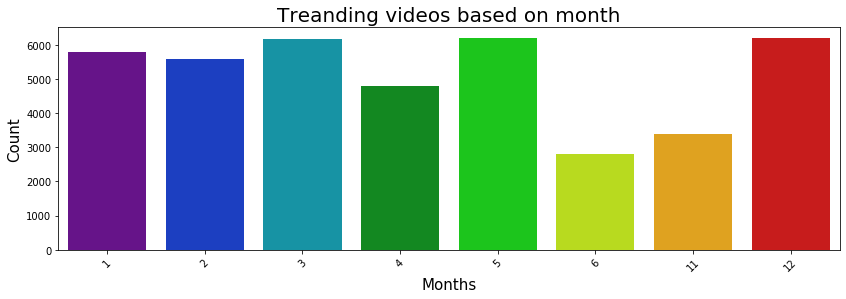

In [103]:
USvideo['trending_date_month'] = USvideo['trending_date'].dt.month

print("Category Name count")
print(USvideo['trending_date_month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x = 'trending_date_month', data=USvideo, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Treanding videos based on month", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

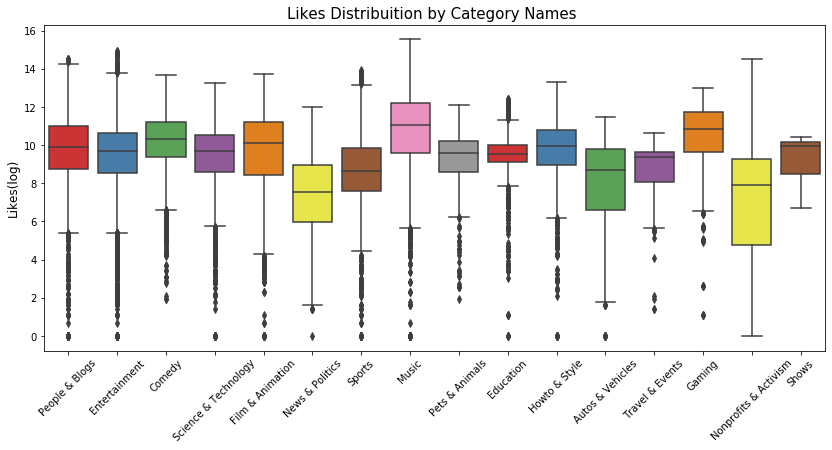

In [104]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_title', y='likes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

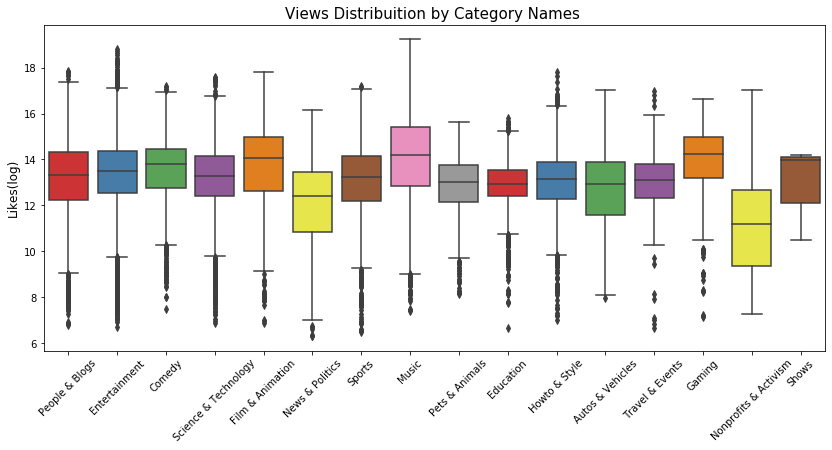

In [105]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_title', y='views_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

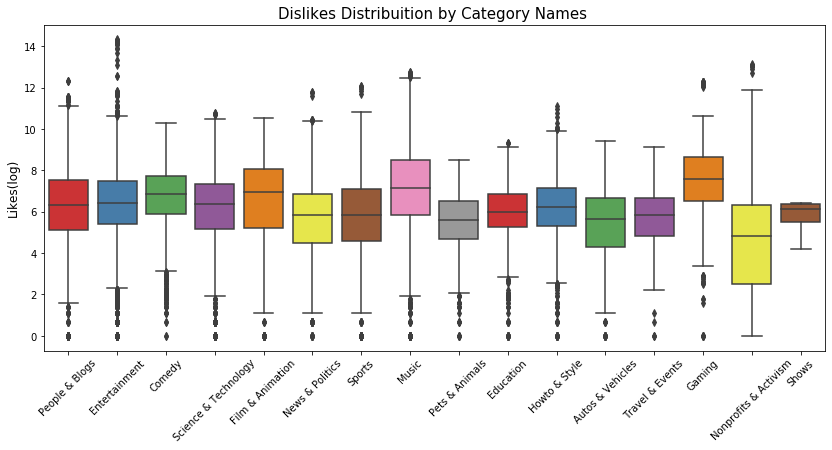

In [106]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_title', y='dislikes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

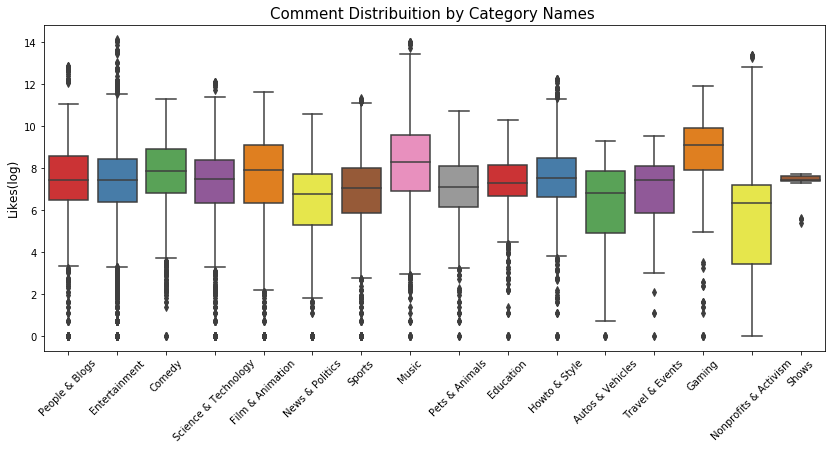

In [107]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_title', y='comment_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comment Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

In [127]:
bins = [0,100000, 200000, 300000,400000, 1000000, 2000000, 5000000, 100000000]
USvideo['biningC'] = pd.cut(USvideo['views'], bins)
print(USvideo.groupby('biningC').size())

biningC
(0, 100000]             5330
(100000, 200000]        3492
(200000, 300000]        3347
(300000, 400000]        2735
(400000, 1000000]       9704
(1000000, 2000000]      6915
(2000000, 5000000]      5663
(5000000, 100000000]    3723
dtype: int64


In [109]:
USvideo.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_title,likes_log,views_log,dislikes_log,comment_log,category_name,publish_time_month,publish_time_hour,trending_date_month,biningC
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,People & Blogs,10.960027,13.525659,7.995307,9.677528,People and Blogs,11,17,11,NaN
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute,cats,thai,eggs",98966,2486,184,...,People & Blogs,7.818832,11.502542,5.220356,6.278521,People and Blogs,4,6,11,NaN
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,...,People & Blogs,8.401109,12.679365,7.480428,6.797940,People and Blogs,11,15,11,NaN
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,...,People & Blogs,8.888895,12.191279,5.384495,6.124683,People and Blogs,11,18,11,NaN
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,"wearing online dollar store makeup for a week,...",2744430,115426,1110,...,People & Blogs,11.656394,14.825084,7.013016,8.785998,People and Blogs,11,1,11,NaN
5,pa_oUisZZy0,2017-11-14,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11 00:30:16,"BuzzFeed,buzzfeed celeb,Mark Ruffalo,Thor,Ragn...",177707,6271,88,...,People & Blogs,8.743851,12.087897,4.488636,5.620401,People and Blogs,11,0,11,NaN
6,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,2017-11-09 11:24:14,"Japan,Japanese,yt:cc=on,idiot's,guide,squat,to...",1098897,43875,1326,...,People & Blogs,10.689123,13.909818,7.190676,8.455956,People and Blogs,11,11,11,NaN
7,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,2017-11-09 07:00:01,"Full Frontal with Samantha Bee,Full Frontal,Sa...",362009,5505,2356,...,People & Blogs,8.613594,12.799427,7.765145,7.142827,People and Blogs,11,7,11,NaN
8,EYkEshCOhEU,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,2017-11-10 00:24:29,"nicole guerriero,arriba liqud lipstick,colourp...",294387,15247,385,...,People & Blogs,9.632204,12.592654,5.955837,6.884487,People and Blogs,11,0,11,NaN
9,Eg_kW5fw6qU,2017-11-14,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,2017-11-09 23:27:18,"SuperCarlinBrothers,disney,fox,disney princess...",188003,9091,135,...,People & Blogs,9.115150,12.144219,4.912655,7.942718,People and Blogs,11,23,11,NaN


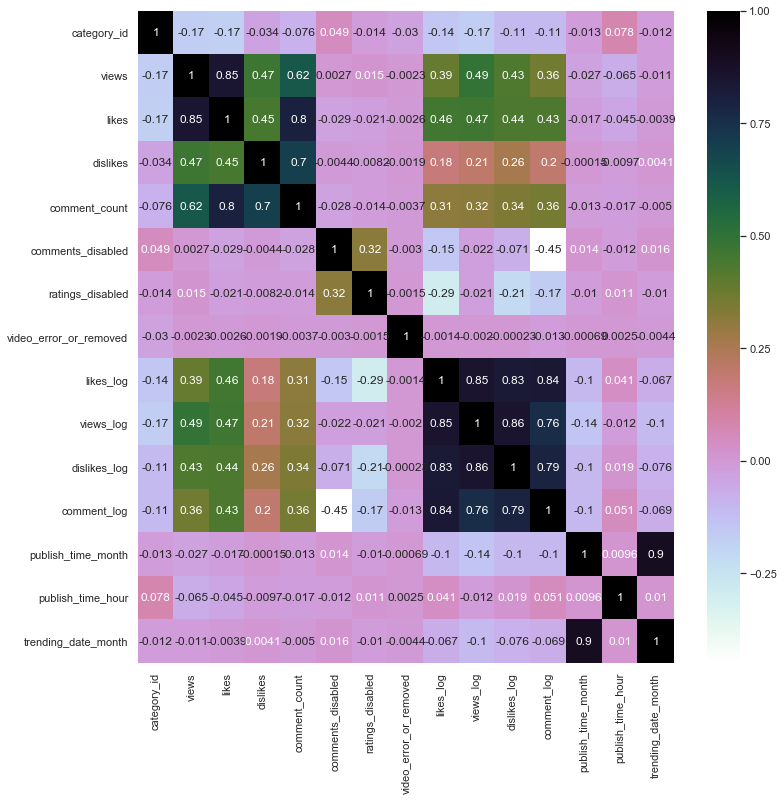

In [131]:
plt.figure(figsize=(12,12))
sns.heatmap(USvideo.corr(),annot=True,cmap='cubehelix_r')#draws heatmap with input as the correlation matrix calculated by (iris_data.corr())
plt.show()
